# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Regresja liniowa wielu zmiennych



In [5]:
%matplotlib notebook 
import numpy as np 
from time import sleep
import matplotlib.pyplot as plt


x = np.array([-2.29399323, -1.43363036, -0.52468804])
y = np.array([-7.77733551, -2.70740336, -2.41251556,])
m = x.shape[0]


Tworzymy  z potęg $x$ sztuczne cechy $x^2,x^3,...$. 

Chcemy rozwiązać problem regresji liniowej wielu zmiennych - czyli dopasowania funkcji liniowej wielu zmiennych do danych.

$$y_i = \sum_j w_j x_{ij} + b$$


 - $N$ to wymiar przestrzeni cech
 - $m$ - liczba przykładów

In [6]:
N = 2
X = np.stack([x**i for i in range(1,N+1)]).T
X_orig = X.copy()
y_orig = y.copy()
X.shape

(3, 2)

In [7]:
w, b = np.ones(N), 0.1
w

array([1., 1.])

In [10]:
X[0,:], y[0]  #cecha i potega

(array([-2.29399323,  5.26240494]), -7.77733551)

In [18]:
np.dot(X, w), X.shape, w.shape

(array([ 2.96841171,  0.62166565, -0.2493905 ]), (3, 2), (2,))

In [19]:
np.dot(w, X.T), w.shape, X.shape, X.T.shape

(array([ 2.96841171,  0.62166565, -0.2493905 ]), (2,), (3, 2), (2, 3))

## Funkcja straty

Funkcją straty będzie suma kwadratów odchyleń przewidywania modelu od rzeczywistej wartości:

$$ L = \frac{1}{2m} \sum_{i=0}^{m-1} ( \sum_{j=0}^{N-1} w_j x_{ij} +b - y_i)^2$$

### Exercise 1:  zaimplementuj powyższą funkcję straty

In [11]:
L = lambda w,b: 0.5/m*np.sum((np.dot(X,w)+b-y)**2)

In [12]:
np.testing.assert_approx_equal(L(np.array([1,2]),3),76.863,significant=3)

### Zadanie 2

Zaimplementuj gradienty

$$\frac{\partial L}{\partial w_j} = \frac{\partial  \frac{1}{2m} \sum_{i=0}^{m-1} (w\cdot x_i+b - y_i)^2}{\partial w_j}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w \cdot x_i+b - y_i)  x_{ij}
$$

$$\frac{\partial L}{\partial b} = \frac{\partial  \frac{1}{2} \sum_{i=0}^{m-1} (w\cdot x_i+b - y_i)^2}{\partial b}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w\cdot x_i+b - y_i)  
$$

- $w\cdot x_i $ oznacza iloczyn skalarny wag i cech dla $i$-tego przykładu



In [20]:
# w*x_i = w_1 x_i1 + w_2 x_i2 + ...
w, b = np.ones(N), 0.1

dw = 1/m*((np.dot(X, w)+b-y).dot(X)) #+ 0.0*w
db = 1/m*np.sum(np.dot(X,w)+b-y)
dw,db

(array([-10.32784093,  21.58183278]), 5.512647095906201)

In [21]:
np.testing.assert_approx_equal(db,5.5126470959062,significant=4)
np.testing.assert_allclose(dw,np.array([-10.32784093,21.58183278]))

<IPython.core.display.Javascript object>


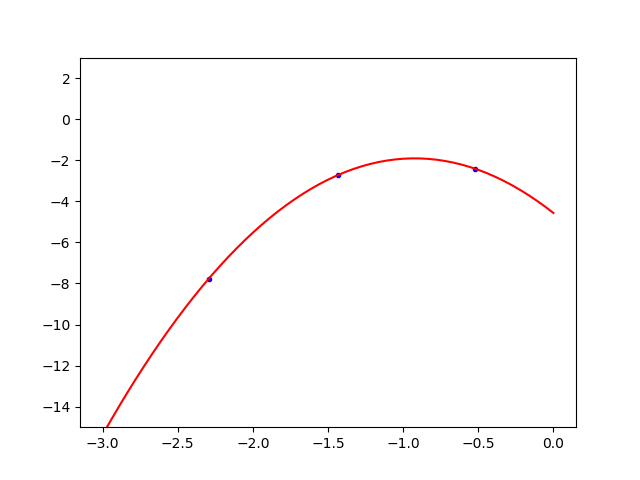

(-15, 3)

In [43]:
alpha = 0.1
w, b = np.ones(N), 0.1

plt.plot(X[:,0],y,'b.')
xlin = np.linspace(-3,0,55)
Xlin = np.stack([xlin**i for i in range(1,N+1)]).T
l = plt.plot(xlin,np.dot(Xlin,w)+b,'r-')[0]
ax = plt.gca()
fig = plt.gcf()
ax.set_ylim(-15,3)

In [44]:
n = m # m all, n subset
alpha = .02
w, b = np.ones(N), 0.1
for i in range(20000):    
    ith = np.random.choice(m,n,replace=False)

    X = X_orig[ith,:]
    y = y_orig[ith]
    dw,db = None,None
    
    dw = 1/m*((np.dot(X, w)+b-y).dot(X)) + 0.0*w
    db = 1/m*np.sum(np.dot(X,w)+b-y)

    w = w - alpha*dw
    b = b - alpha*db
    
    if i%100==0:
        l.set_data(xlin,np.dot(Xlin,w)+b)
        fig.canvas.draw()
        print(np.sum(w**2),b,L(w,b),end='\r')
    #sleep(0.1)

### Rozwiązanie dokładne

In [45]:
X = X_orig[:,:]
y = y_orig[:]

A = np.stack([x**i for i in range(N+1)]).T
A.shape,y.shape

((3, 3), (3,))

In [46]:
sol = np.linalg.solve(A.T.dot(A),A.T.dot(y))

In [47]:
A.shape,N

((3, 3), 2)

In [48]:
sol,b,w

(array([-4.60964102, -5.83878633, -3.14719809]),
 -4.5701251162012975,
 array([-5.76818099, -3.12308702]))

<IPython.core.display.Javascript object>


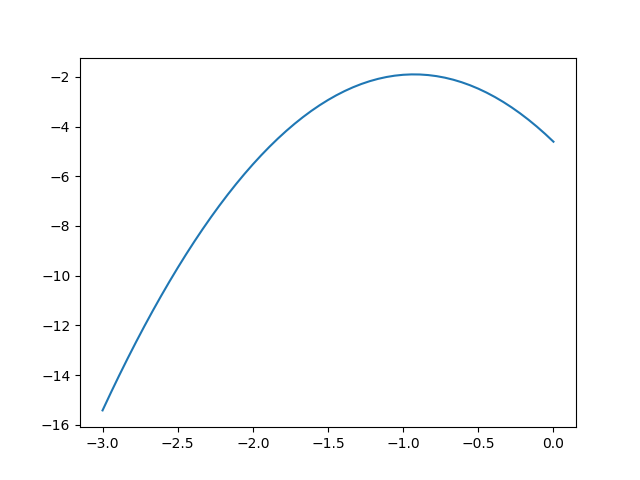

In [49]:
#plt.figure()
plt.plot(xlin,np.stack([xlin**i for i in range(N+1)]).T.dot(sol))
#plt.plot(x,y,'o')

In [50]:
A.T.dot(A).shape,(A.T).dot(y).shape,

((3, 3), (3,))

In [42]:
np.dot(Xlin,w).shape,Xlin.shape,w.shape

((55,), (55, 2), (2,))